<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 18**

## **Contenido**

- <a href="#svm"> SVM (*Support Vector Machines*)</a><br>
  - <a href="#svm"> SVM Lineal</a><br>
    - <a href="#cmf"> Clasificador lineal de margen fuerte</a><br>
    - <a href="#cmd"> Clasificador lineal de margen débil</a><br>
  - <a href="#svnl"> SVM no Lineal</a><br>
    - <a href="#ker"> Kernels</a><br>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs

from mlxtend.plotting import plot_decision_regions

<p><a name="svm"></a></p>

# **SVM (*Support Vector Machines)***

EL SVM es un modelo de ML muy potente y versátil, capaz de realizar tareas de clasificación y regresión lineales y/o no lineales. 

Tiene además una base teórica muy sólida que, en contraste con otro tipo de clasificadores, como por ejemplo las redes neuronales, nos permite conocer detalladamente cada paso en el proceso de clasificación.



<p><a name="cmf"></a></p>

# **SVM Lineal**

### **Clasificador lineal de margen fuerte**

Para comenzar, consideremos un conjunto de datos separable linealmente. 

Sabemos que la frontera de decisión está dada por 

$$ \mathbf{w}^T \mathbf{x} = 0$$ 

la cual define una línea (en general un hiperplano). 

¿Qué línea deberíamos elegir?



![](https://i.imgur.com/KO7TNcZ.png)

El margen $m$ está definido como la distancia entre las instancias de entrenamiento de las dos clases más cercanas a la frontera de decisión, conocidas como *vectores de soporte*. 

Estos vectores de soporte definen dos líneas que son paralelas a la frontera de desición, y que se expresan como:




$$\mathbf{w}^T \mathbf{x}_{\text{pos}} = +1$$

$$\mathbf{w}^T \mathbf{x}_{\text{neg}} = -1$$



restando estas expresiones y normalizando con $||\mathbf{w}|| = \sqrt{\sum w_i^2}$ se obtiene el margen:



$$m=\frac{\mathbf{w}^T(\mathbf{x}_{\text{pos}} - \mathbf{x}_{\text{neg}})}{||\mathbf{w}|||} = \frac{2}{||\mathbf{w}||}$$



En el caso separable, el mejor modelo será aquel que **maximice el margen**, que como vemos, depende únicamente del vector de pesos $\mathbf{w}$. 

Si además exigimos evitar cualquier violación de margen, es decir, no permitir que hayan instancias dentro del margen, entonces necesitamos que la función de decisión sea mayor que 1 para todas las instancias de entrenamiento positivo y menor que –1 para instancias de entrenamiento negativo

![](https://i.imgur.com/9PZ7AcL.png)

Así, en el caso separable, la solución del SVM es un hiperplano que maximiza el margen (un margen más grande contribuye a una mejor generalización) mientras clasifica correctamente todos los puntos de entrenamiento, lo que define un clasificador lineal de margen fuerte. 

Lo anterior puede expresarse como la solución al siguiente problema de optimización convexo:

\begin{equation}
\underset{\mathbf{w}}{\text{min}} \;  \frac{1}{2}||\mathbf{w}||^2
\end{equation}

sujeto a la condición:

\begin{equation}
t_i(\mathbf{w}^T  \mathbf{x}_i) \geq 1
\end{equation}

donde 

\begin{equation}
t_i = 
\begin{cases}
 -1 & si & y_{i} = 0 \\
 1 & si & y_{i} = 1\\
\end{cases}\end{equation}

con la cual se exige que los puntos estén por fuera del margen.



<p><a name="cmd"></a></p>

### **Clasificador lineal de margen débil**

Hay dos problemas principales con la clasificación de margen fuerte: Primero, solo funciona si los datos son linealmente separables y, segundo, es bastante sensible a valores atípicos. 

Consideremos el siguiente conjunto de datos:

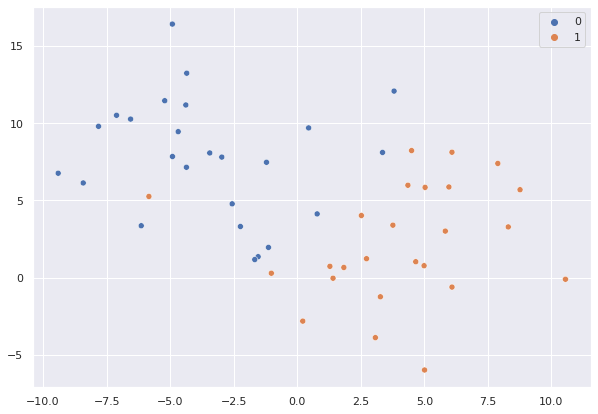

In [ ]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=4, random_state=42)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

En este caso no podemos implementar el clasificador de margen fuerte, por lo que consideramos lo que se conoce como un *clasificador lineal de margen débil*, que es un clasificador que permite tener instancias dentro del margen de tal manera que se tenga un modelo más flexible. 

Una vez le damos esa flexibilidad al modelo, se debe definir una forma en la que podamos cuantificar la violación de margen. Para esto introducimos una nueva variable $\xi_i \geq 0$, que mide cuánto se le permite a la i-ésima instancia violar el margen. 

El objetivo es encontrar un buen equilibrio entre mantener el margen lo más grande posible y limitar las violaciones de margen.

![](https://i.imgur.com/EluK4e1.png)



Lo anterior define el siguiente problema de optimización restringido:

\begin{equation}
\underset{\mathbf{w}, \xi}{\text{min}} \left\{ \frac{1}{2}||\mathbf{w}||^2 + C \sum_i \xi_i\right\}
\end{equation}

sujeto a las condiciones:

\begin{equation}
t_i(\mathbf{w}^T \mathbf{x}_i) \geq 1 - \xi_i \; \; ; \; \; \xi_i \geq 0
\end{equation}

Note que tenemos dos objetivos en conflicto: hacer que las variables $\xi_i$ sean lo más pequeñas posibles para reducir las violaciones del margen y hacer que $\frac{1}{2}||\mathbf{w}||^2$ sea lo más pequeño posible para aumentar el margen. El hiperparámetro $C$ permite definir el balance entre estos dos objetivos.

Lo anterior define lo que se conoce como un *problema de programación cuadrática* (QP), ya que involucra un problema de optimización convexo con condiciones lineales. 

Podemos entrenar un modelo como estos minimizando la siguiente función de costo

$$J(\mathbf{w}) = \frac{1}{2}||\mathbf{w}||^2 + C \sum_i^{n}\max\left[0, 1-t_i(\mathbf{w}^T \mathbf{x}_i)\right]$$

El segundo término de la función de costo se conoce como la función *hinge*:


![](https://i.imgur.com/pELObcA.png)

La función *hinge* es cero si la instancia se clasifica correctamente, mientras que para las instancias que se clasifiquen incorrectamente, el valor de la función *hinge* es proporcional a la distancia que hay desde la frontera de decisión a la instancia.

Podemos entrenar un modelo como estos utilizando el estimador `SGDClassifier` y especificando la función de costo `hinge` o `squared_hinge`:

In [ ]:
from sklearn.linear_model import SGDClassifier

svm_clf = SGDClassifier(loss="hinge")

Sklearn contiene el estimador `LinearSVC`, que implementa el paquete [LIBLINEAR](https://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf) para resolver tareas de clasificación lineal y regresión regularizadas, más eficiente cuando la escala del número de instancias es muy grande. Esta implementación permite realizar tareas de clasificación multinomial.

Hay que tener en cuenta que `LinearSVC` regulariza el término de sesgo, por lo que primero debemos centrar el conjunto de entrenamiento restando su media. Esto es automático si estandarizamos los datos:

In [ ]:
from sklearn.svm import LinearSVC

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC()).fit(X, y)

In [ ]:
# funcion de decision
svm_clf.decision_function(X)

array([ 0.23552404, -2.55845177, -2.22938344, -0.36022956, -2.05905846,
       -1.44087357, -1.08276988,  1.15821233,  1.57750412,  0.08774093,
        1.24319547,  1.55137892,  0.0414506 ,  0.54094542, -2.0407111 ,
        0.82183739, -1.07998767,  0.96677398,  0.02228172,  0.62192357,
        2.43158787, -1.60930427, -1.96743091, -1.24949769, -1.27418587,
       -2.12514527,  1.34849575,  0.73221312, -1.86221883,  2.17951957,
        0.88789369, -0.69917557, -1.20185368,  1.67832737,  1.20279252,
        0.0186375 ,  0.81182995,  0.64353116,  0.42063659,  0.02215168,
        1.29648848, -1.77916117, -0.39255641,  0.72958327, -2.19247972,
        0.74477148, -0.71347859,  0.25707095,  0.50124725, -0.61089204])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


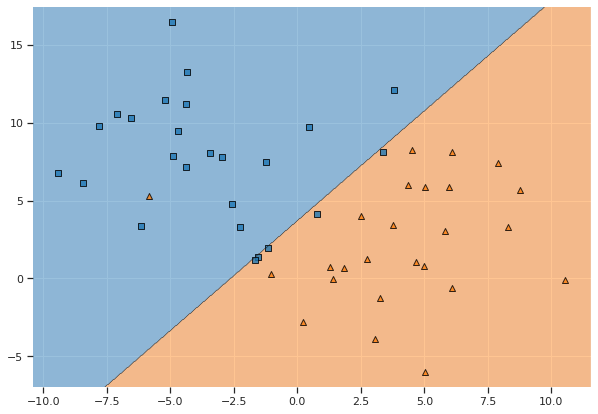

In [ ]:
# regiones de decision
plt.figure(figsize=(10,7))
plot_decision_regions(X, y, svm_clf)
plt.legend().remove();

Ya vimos que el hiperparámetro nos permite controlar el balance entre la maximazación del margen y la violación de margen. Veamos cómo es la dependencia del margen con el valor del hiperparámetro $C$:

![](https://i.imgur.com/cY2L9GM.png)

![](https://i.imgur.com/TMkpUhv.png)

![](https://i.imgur.com/OOhvxvv.png)

<p><a name="svnl"></a></p>

# **SVM No lineal**

Aunque los clasificadores SVM lineales son eficientes y funcionan sorprendentemente bien en muchos casos, muchos conjuntos de datos ni siquiera están cerca de ser separables linealmente. 



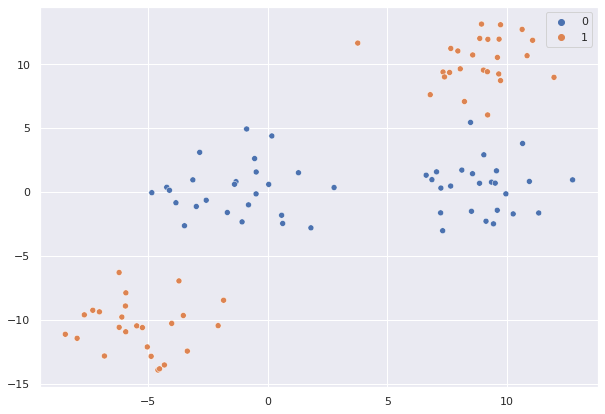

In [ ]:
n_samples = 100
centers = [(-5,-10),(9,10),(-1,0),(9,0)]

X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, cluster_std=2, random_state=42)

y = np.array([1 if label==0 or label==1 else 0 for label in y])

plt.figure(figsize=(10,7))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

Obviamente, no podremos separar las clases utilizando una frontera de decisión lineal

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


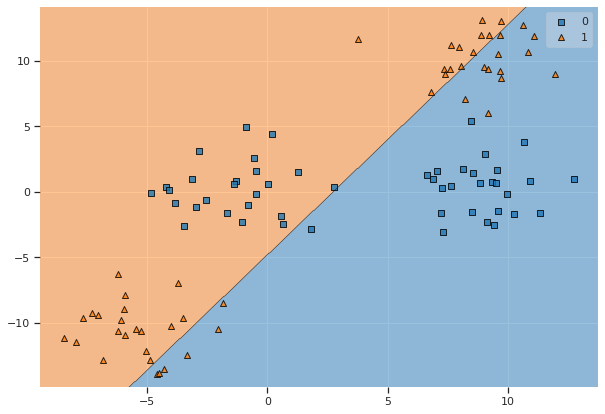

In [ ]:
svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC()).fit(X, y)

plt.figure(figsize=(10,7))
plot_decision_regions(X, y, svm_clf)

Un enfoque para manejar datos no lineales es agregar combinaciones no lineales de las características originales para proyectar las instancias en un espacio de mayor dimensión utilizando una función de mapeo $\phi$, donde los datos sean separables linealmente





![](https://i.imgur.com/kKXrtAp.png)

Un ejemplo particular es la transformación polinomial que ya hemos implementado

$$
\phi(x_1, x_2) = (x_1, x_2, x_1x_2, x_1^2, x_2^2)
$$

Esta transformación nos permite separar las dos clases utilizando un plano que se convierte en una frontera de desición no lineal cuando la proyectamos en el espacio de características original

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


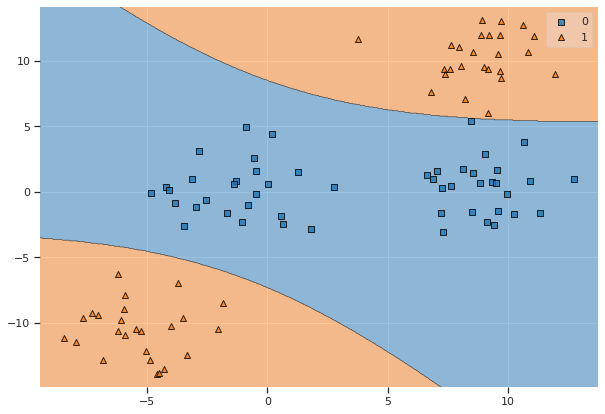

In [ ]:
svm_clf = make_pipeline(PolynomialFeatures(),
                        StandardScaler(),
                        LinearSVC()).fit(X, y)

plt.figure(figsize=(10,7))
plot_decision_regions(X, y, svm_clf)

El problema con este tipo de mapeos es que la construcción de las nuevas características es costoso computacionalmente, sobretodo si estamos tratando con datos de una alta dimensionalidad. 





<p><a name="ker"></a></p>

## **Kernels**

La razón por la cual el SVM es tan popular se debe a que este se puede *kernelizar* para resolver problemas de clasificación no lineales. Los kernels son funciones que permiten trabajar de forma eficiente en espacios de alta dimensionalidad sin tener que realizar transformaciones explícitamente. Veamos:

Dado un problema de optimización restringido, conocido como problema primario, es posible expresar un problema diferente pero estrechamente relacionado, llamado problema dual

* Primal problem

\begin{equation}
\underset{w, \xi}{\text{min}} \left \{  \frac{1}{2}||\mathbf{w}||^2 +C\sum_i \xi_i \right \}
\end{equation}

\begin{equation}
t_i(\mathbf{w}^T \mathbf{x}_i) \geq 1 - \xi_i
\end{equation}

* Dual problem
\begin{equation}
\underset{\alpha}{\text{max}}\left \{  \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_j \alpha_i \alpha_j y_i y_j (\mathbf{x}_i^{T} \mathbf{x}_j)  \right \}
\end{equation}

\begin{equation}
0 \leq \alpha_i \leq C \; \; \; ; \; \; \; \sum_i \alpha_i y_i = 0
\end{equation}

Ambos problemas están relacionados por
\begin{equation}
\mathbf{w} = \sum_i \alpha_iy_i \mathbf{x}_i
\end{equation}

donde los $\alpha_i$ se conocen como *multiplicadores de Lagrange*. Note que en esta formulación solo nos interesa el resultado del producto escalar $\mathbf{x}_i^{T} \mathbf{x}_j$, que es simplemente un número real. La clave es que no nos importará cómo se obtenga este número siempre que sea correcto.

Entonces, en lugar de transformar el espacio de características original en un espacio de mayor dimensionalidad, mediante la transformación de $\mathbf{x}_i$ en $\phi(\mathbf{x}_i)$ y $\mathbf{x}_j$ en $\phi(\mathbf{x}_j)$ para obtener $\phi(\mathbf{x}_i)^T$ $\phi(\mathbf{x}_j)$ (lo cual, como ya se mencionó, es muy costoso computacionalmente), utilizamos el *truco del kernel*, donde podemos deshacernos de las transformación de las instancias en esos espacios de dimensión superior y ahorrarnos el calculo de los productos punto en esos espacios.

Podemos decir entonces que un **kernel** es una función capaz de calcular el producto escalar $\phi(\mathbf{x}_i)^T$ $\phi(\mathbf{x}_j)$ basándose únicamente en los las instancias originales $(\mathbf{x}_i, \mathbf{x}_j)$, sin tener que calcular la transformación $\phi$:

\begin{equation}
 K(\mathbf{a}, \mathbf{b}) = \phi(\mathbf{a})^T \phi(\mathbf{b}) 
\end{equation}

Una vez el problema de optimización se soluciona, la salida del método `decision_function` para una instancia $x$ dada será:

$$
\mathbf{w}^T \mathbf{x} = w_0 + \sum_i \alpha_i y_i K(\mathbf{x}_i, \mathbf{x})
$$

y la clase predicha corresponderá a su signo:

\begin{equation}
\hat y= 
\begin{cases}
 0 & si & \mathbf{w}^T \mathbf{x} < 0 \\
 1 & si & \mathbf{w}^T \mathbf{x} \geq 0\\
\end{cases}\end{equation}







**Ejemplo:** Considere la transformación


$$\phi(q, p) = (q^2, \; \sqrt{2} q p, \; p^2)$$ 


para las instancias $\mathbf{a} = (q_1, p_1)$ y $\mathbf{b}=(q_2,p_2)$, tendríamos

$$
\phi(q_1, p_1) = (q_1^2, \; \sqrt{2} q_1 p_1, \; p_1^2)
$$

$$
\phi(q_2, p_2) = (q_2^2, \; \sqrt{2} q_2 p_2, \; p_2^2)
$$

el producto punto será

$$
\phi(q_1, p_1) \cdot \phi(q_2, p_2) = q_1q_2 + 2q_1q_2p_1p_2 + p_1p_2
$$

Ahora, podríamos calcular el producto punto entre $\mathbf{a}$ y $\mathbf{b}$ para obtener: 

$$
(q_1, p_1) \cdot (q_2,p_2) = q_1q_2 + p_1p_2
$$

y luego obtener el cuadrado de esta expresión 

$$
(q_1q_2 + p_1p_2)^2 = q_1q_2 + 2q_1q_2p_1p_2 + p_1p_2
$$

Note que este es exactamente el mismo resultado que se obtuvo con $\phi(\mathbf{a}) \cdot \phi(\mathbf{b})$. Este es un ejemplo del *truco del kernel*, donde se ha utilizado el kernel 

$$K(\mathbf{a}, \mathbf{b}) = (\mathbf{a} \cdot \mathbf{b})^2$$




Podemos implementar esta versión kernelizada del SVM mediante el estimador `SVC` de Sklearn. Este se implementa mediante el paquete  [LIBSVM](https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf), que utiliza un algoritmo de optimización (SMO) para resolver el problema de programación cuadrática para la versión kernelizada del SVM. 

Esta implementación es eficiente hasta un número de instancias del orden de decenas de miles. Adicionalmente, permite realizar tareas de clasificación multinomial.

Podemos elegir el kernel mediante el hiperparámetro `kernel`

* Linear:
\begin{equation}
K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \cdot \mathbf{b}
\end{equation}

* Polynomial:
\begin{equation}
K(\mathbf{a}, \mathbf{b}) = (\gamma \mathbf{a}^T \cdot \mathbf{b} + r)^d
\end{equation}

* Gaussian RBF: 
\begin{equation}
K(\mathbf{a}, \mathbf{b}) = \exp(-\gamma ||\mathbf{a} - \mathbf{b}||^2)
\end{equation}

* Sigmoid:
$$
K(\mathbf{a}, \mathbf{b}) = \tanh(\gamma \mathbf{a}^T\mathbf{b} + r)
$$

donde los parámetros $\gamma$, $d$ y $r$ corresponden a los hiperparámetros `gamma`, `degree` y `coef0`, respectivamente. 

Construyamos una función `plot_svm_clf` que grafique las regiones de decisión para cada kernel:

In [ ]:
from sklearn.svm import SVC

def plot_svm_clf(**kwargs):
  svm_clf = make_pipeline(StandardScaler(),
                          SVC(**kwargs)).fit(X, y)

  plt.figure(figsize=(10,7))
  plot_decision_regions(X, y, svm_clf)                    

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


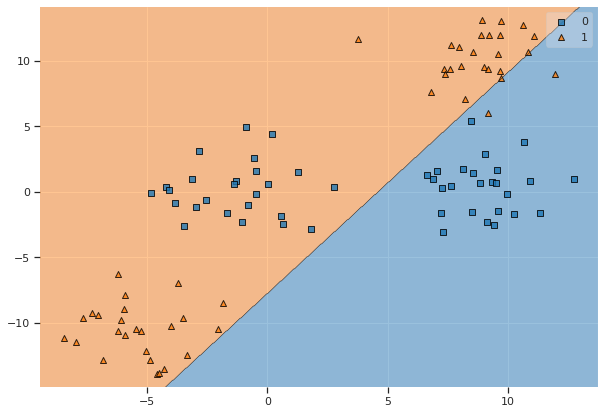

In [ ]:
plot_svm_clf(kernel="linear")

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


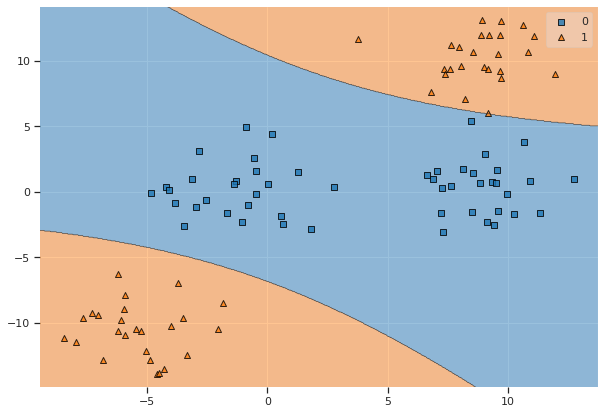

In [ ]:
plot_svm_clf(kernel="poly", degree=2, coef0=1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


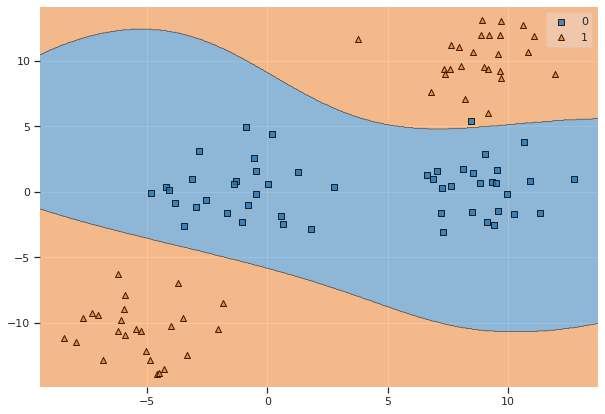

In [ ]:
plot_svm_clf(kernel="rbf", gamma=1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


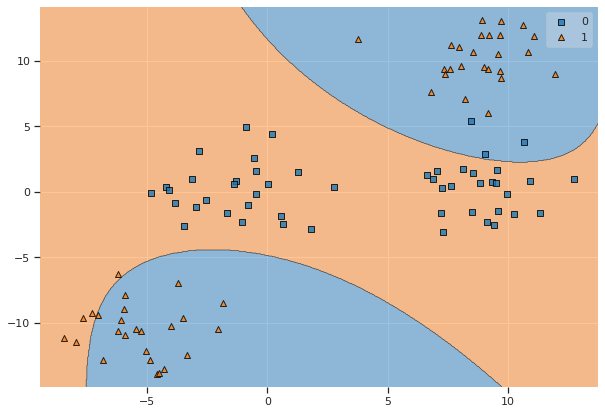

In [ ]:
plot_svm_clf(kernel="sigmoid", gamma=1, coef0=1)